# Support Vector Machine

A Support Vector Machine (SVM) is a supervised machine learning algorithm used for classification and regression tasks. It is a powerful and versatile method that has gained popularity for its ability to handle both linear and non-linear data by finding an optimal decision boundary or hyperplane that maximizes the separation between different classes or targets.
Here are the key concepts and principles associated with Support Vector Machines:
#### 1.Hyperplane:
In a binary classification problem (where there are two classes), a hyperplane is a decision boundary that separates data points belonging to different classes.In a two-dimensional space, a hyperplane is a line, while in a higher-dimensional space, it becomes a flat affine subspace.
#### 2.Margin:
The margin is the region surrounding the hyperplane that contains no data points.
#### 3.Support Vectors:
Support vectors are the data points that are closest to the hyperplane and play a crucial role in defining the margin. They can change position of hyperplane if removed or modified.
#### 4.Linear and Non-Linear SVM:
SVM can be applied to linearly separable data using a linear kernel, which results in a linear decision boundary.For non-linear data, SVM can employ kernel functions (e.g., polynomial, radial basis function or RBF, sigmoid) to map the data into a higher-dimensional space, where a hyperplane can separate it linearly.

## Problem Statement :
#### classify the Size_Categorie using SVM    

### Import libraries

In [2]:
# importing libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score

In [3]:
ls

 Volume in drive C is program files
 Volume Serial Number is 5C10-FCA7

 Directory of C:\Users\Sayali Hatwar\OneDrive\Desktop\Assignment files\17. SVM assignment

19-01-2023  00:34    <DIR>          .
19-01-2023  00:34    <DIR>          ..
19-01-2023  00:34    <DIR>          .ipynb_checkpoints
19-01-2023  00:34            62,242 Assignment no.17 - (forest).ipynb
15-01-2023  02:05           101,184 Assignment no.17 - (salary_data).ipynb
15-01-2023  00:57               549 forest fires.txt
15-01-2023  00:57            46,843 forestfires.csv
15-01-2023  00:57               608 Problem_statement(salary_data).txt
15-01-2023  00:57         1,694,474 SalaryData_Test(1).csv
15-01-2023  00:57         3,393,618 SalaryData_Train(1).csv
               7 File(s)      5,299,518 bytes
               3 Dir(s)  116,807,184,384 bytes free


### Reading File

In [4]:
# reading csv file
forest = pd.read_csv('forestfires.csv')
forest.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


### EDA

In [6]:
# measuring shape
forest.shape

(517, 31)

In [7]:
# describing file
forest.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,...,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,0.164410,...,0.017408,0.038685,0.003868,0.061896,0.032882,0.104449,0.003868,0.001934,0.029014,0.332689
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,0.371006,...,0.130913,0.193029,0.062137,0.241199,0.178500,0.306138,0.062137,0.043980,0.168007,0.471632
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
#information of file
forest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [9]:
#value count of whole file
forest.value_counts()

month  day  FFMC  DMC    DC     ISI   temp  RH  wind  rain  area    dayfri  daymon  daysat  daysun  daythu  daytue  daywed  monthapr  monthaug  monthdec  monthfeb  monthjan  monthjul  monthjun  monthmar  monthmay  monthnov  monthoct  monthsep  size_category
aug    fri  91.0  166.9  752.6  7.1   25.9  41  3.6   0.0   0.00    1       0       0       0       0       0       0       0         1         0         0         0         0         0         0         0         0         0         0         small            2
       sat  93.7  231.1  715.1  8.4   18.9  64  4.9   0.0   0.00    0       0       1       0       0       0       0       0         1         0         0         0         0         0         0         0         0         0         0         small            2
       sun  91.4  142.4  601.4  10.6  19.8  39  5.4   0.0   0.00    0       0       0       1       0       0       0       0         1         0         0         0         0         0         0         0         0 

In [10]:
#checking duplicates
forest.duplicated().sum()

8

In [11]:
# value count for column size category
forest['size_category'].value_counts()

small    378
large    139
Name: size_category, dtype: int64

### Visualization

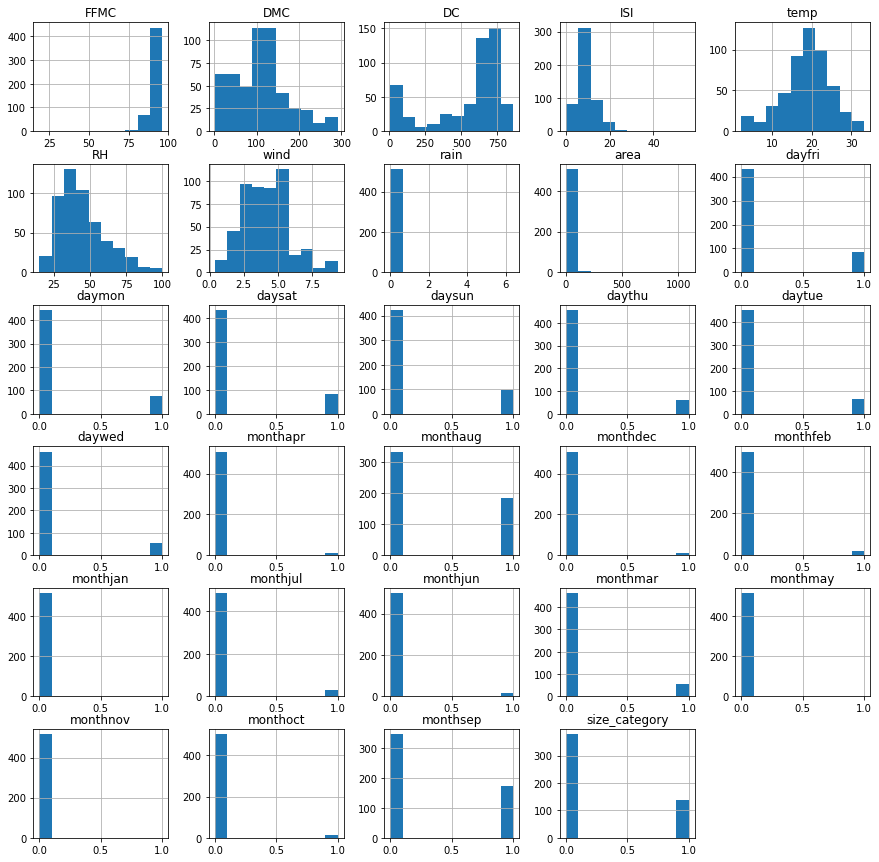

In [29]:
# histogram
import matplotlib.pyplot as plt
forest.hist(figsize = (15,15))
plt.show()

<AxesSubplot:xlabel='size_category', ylabel='count'>

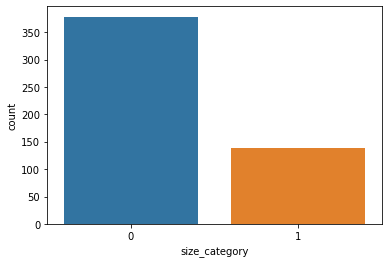

In [32]:
# countplot 
import seaborn as sns
sns.countplot(x='size_category',data=forest)

FFMC


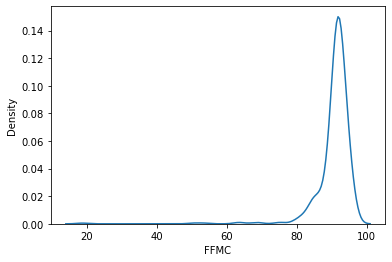

DMC


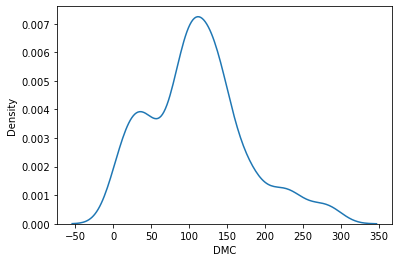

DC


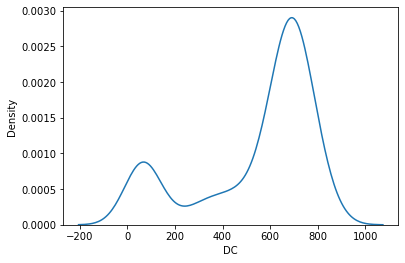

ISI


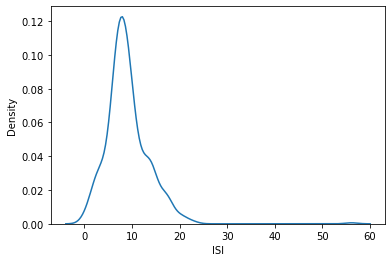

temp


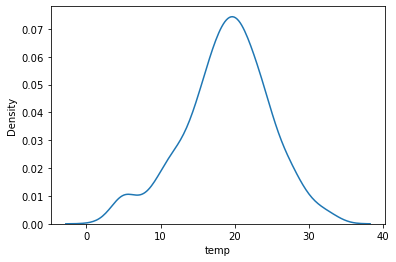

RH


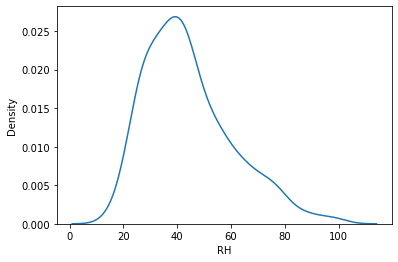

wind


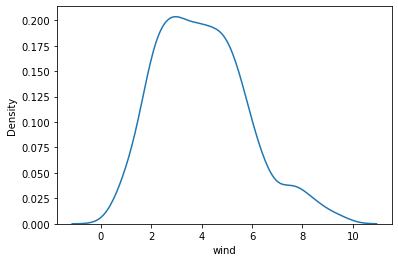

rain


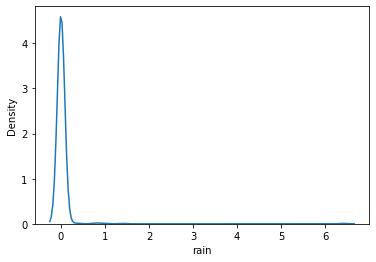

area


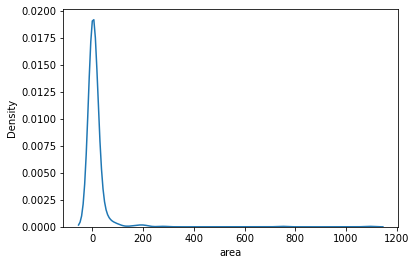

dayfri


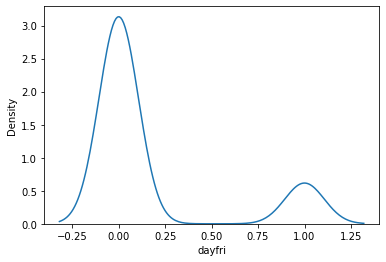

daymon


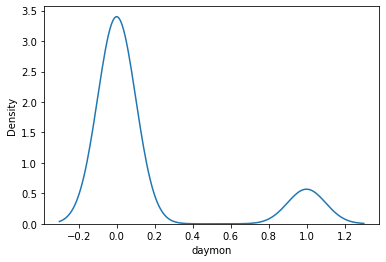

daysat


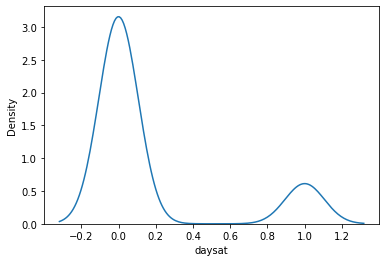

daysun


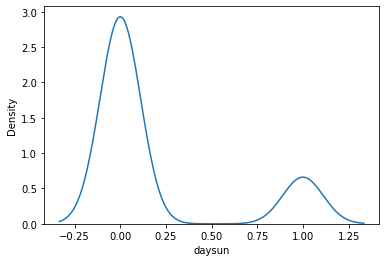

daythu


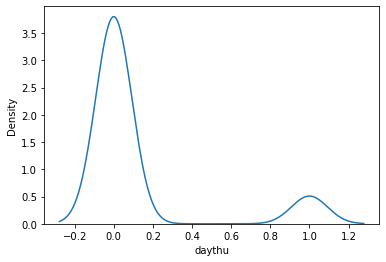

daytue


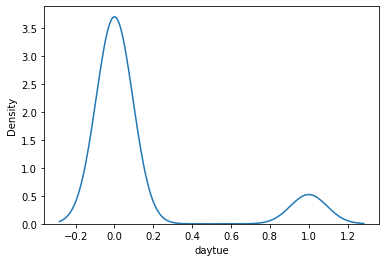

daywed


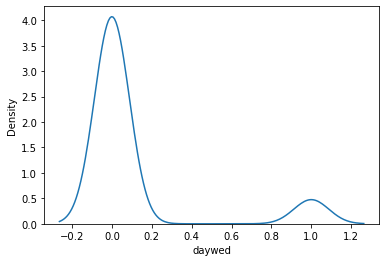

monthapr


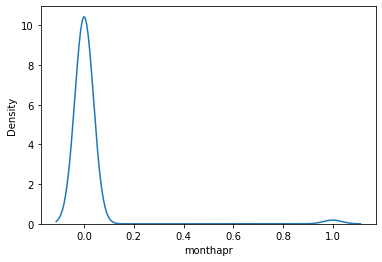

monthaug


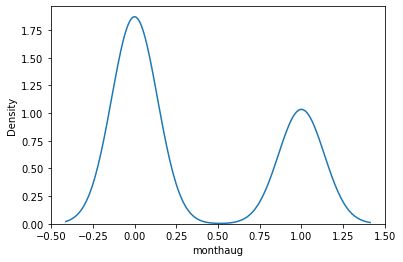

monthdec


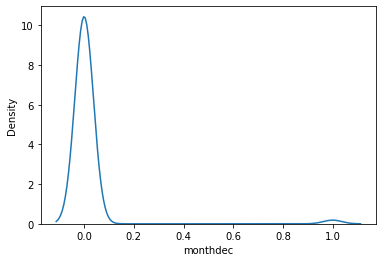

monthfeb


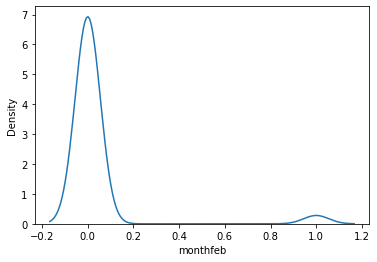

monthjan


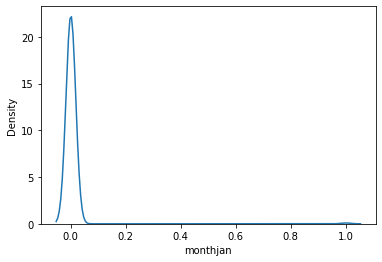

monthjul


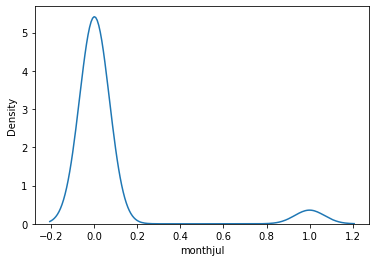

monthjun


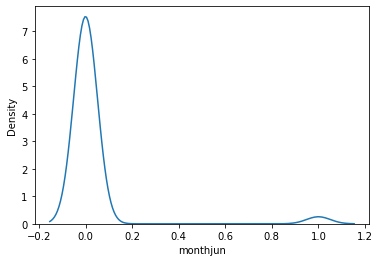

monthmar


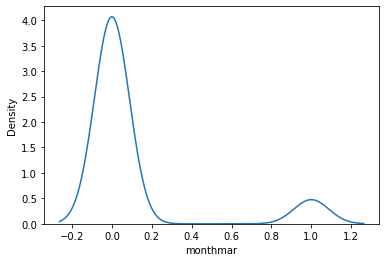

monthmay


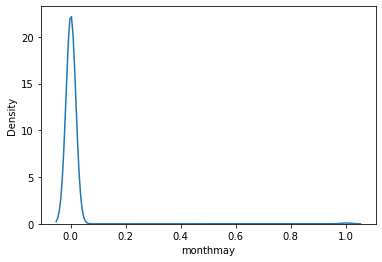

monthnov


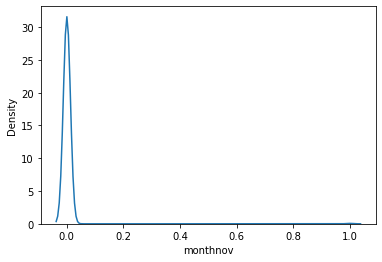

monthoct


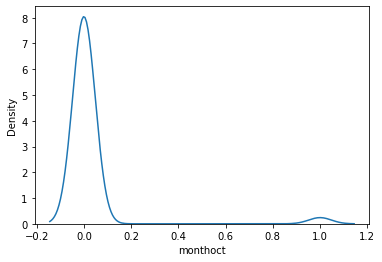

monthsep


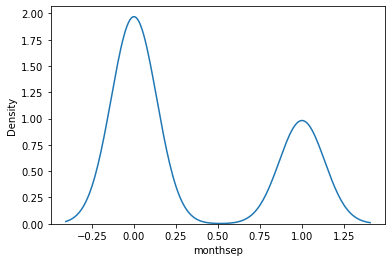

size_category


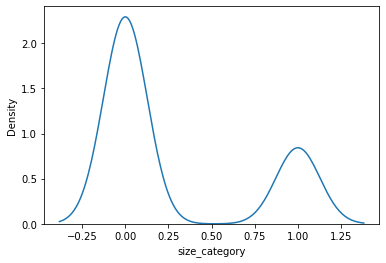

In [39]:
# Kde plot
import seaborn as sns
for n in forest.columns:
    print(n)
    sns.kdeplot(forest[n])
    plt.show()

### Data Preprocessing

if value is large change to 1 if small then change to 0

In [12]:
forest['size_category'] = np.where(forest['size_category'].str.contains("large"), 1, 0)
forest.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,0
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,0
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,0
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,0
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,0


In [13]:
# Dropping day and month column
forest.drop(['month','day'],axis=1,inplace=True)
forest.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1,...,0,0,0,0,1,0,0,0,0,0
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,0
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,0
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1,...,0,0,0,0,1,0,0,0,0,0
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0,...,0,0,0,0,1,0,0,0,0,0


### Selecting Input and Output data

In [15]:
X = forest.iloc[:,:28]
Y = forest.iloc[:,28]

In [16]:
# Splitting of data into training and testing
x_train,x_test,y_train,y_test = train_test_split( X, Y, test_size=0.33, random_state=42)

In [17]:
x_train.shape,x_test.shape

((346, 28), (171, 28))

In [18]:
y_train.shape,y_test.shape

((346,), (171,))

## Randomize search cv

In [28]:
# applying randomised search cv
clf = SVC()
param_grid = [{'kernel':["rbf",'linear'],'gamma':[50,5,10,0.5,1,0.001,0.0001],'C':[1,15,14,12,11,10,0.1] }]
rsv = RandomizedSearchCV(clf,param_grid,cv=10)
rsv.fit(x_train,y_train)

RandomizedSearchCV(cv=10, estimator=SVC(),
                   param_distributions=[{'C': [1, 15, 14, 12, 11, 10, 0.1],
                                         'gamma': [50, 5, 10, 0.5, 1, 0.001,
                                                   0.0001],
                                         'kernel': ['rbf', 'linear']}])

In [29]:
# checking best params and best score for randomize search cv
rsv.best_params_ , rsv.best_score_ 

({'kernel': 'linear', 'gamma': 10, 'C': 14}, 0.9913445378151261)

In [19]:
# checking accuracy for randomize search cv
clf = SVC(C= 14, gamma = 10,kernel="linear")
clf.fit(x_train , y_train)
y_pred = clf.predict(x_test)
acc = accuracy_score(y_test, y_pred) * 100
print("Accuracy =", acc)
print('='*60)
confusion_matrix(y_test, y_pred)
print(classification_report(y_test,y_pred))

Accuracy = 98.83040935672514
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       124
           1       1.00      0.96      0.98        47

    accuracy                           0.99       171
   macro avg       0.99      0.98      0.99       171
weighted avg       0.99      0.99      0.99       171



## Grid search cv

In [20]:
clf = SVC()
param_grid = [{'kernel':["rbf",'linear'],'gamma':[50,5,10,0.5,1,0.001,0.0001],'C':[1,15,14,12,11,10,0.1] }]
gsv = GridSearchCV(clf,param_grid,cv=10)
gsv.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [1, 15, 14, 12, 11, 10, 0.1],
                          'gamma': [50, 5, 10, 0.5, 1, 0.001, 0.0001],
                          'kernel': ['rbf', 'linear']}])

In [21]:
# checking best para and best score for gsv
gsv.best_params_ , gsv.best_score_ 

({'C': 15, 'gamma': 50, 'kernel': 'linear'}, 0.9913445378151261)

In [22]:
# Applying classification on grid search cv
clf = SVC(C= 15, gamma = 50,kernel="linear")
clf.fit(x_train , y_train)
y_pred = clf.predict(x_test)
acc = accuracy_score(y_test, y_pred) * 100
print("Accuracy =", acc)
print('='*60)
confusion_matrix(y_test, y_pred)
print(classification_report(y_test,y_pred))

Accuracy = 98.83040935672514
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       124
           1       1.00      0.96      0.98        47

    accuracy                           0.99       171
   macro avg       0.99      0.98      0.99       171
weighted avg       0.99      0.99      0.99       171



In [27]:
y_pred

array([0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1])